# 线性回归算法的实现

In [56]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l
import matplotlib.pyplot as plt

## 生成数据集
给定W和b，生成数据集。
d2l.synthetic_data生成均值为0，方差为1的X，并添加均值为0，方差为0.01的noise

In [57]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)
# 生成num_examples个在所提供的W和b附近的数据并加以噪声
help(d2l.synthetic_data)

Help on function synthetic_data in module d2l.torch:

synthetic_data(w, b, num_examples)
    Generate y = Xw + b + noise.
    
    Defined in :numref:`sec_linear_scratch`



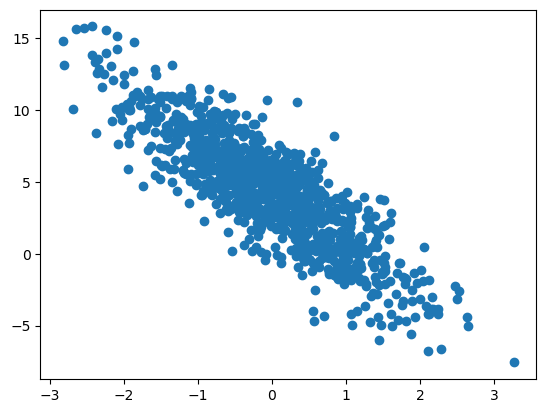

In [58]:
plt.scatter(features[:,1], labels)

## 读取数据集


In [59]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个数据迭代器
       Parameters:
       ---------------
       data_arrays: features ans labels
       batch_size: the size of batch
       is_train: the dataset is training set or not, if it is training set then need to shuffle the order randomly
    """
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [60]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)
# load_array传入一个元祖，和batch_size
next(iter(data_iter))

[tensor([[ 0.9045,  0.2545],
         [-1.3247, -1.1858],
         [ 1.5198, -0.7582],
         [-0.0890, -1.4330],
         [ 0.9050,  0.3686],
         [-0.0954, -1.4143],
         [ 1.0061,  2.4774],
         [-0.3925,  0.2560],
         [-0.5848,  2.1189],
         [-0.0298, -0.8563]]),
 tensor([[ 5.1283],
         [ 5.5912],
         [ 9.8281],
         [ 8.8734],
         [ 4.7456],
         [ 8.8068],
         [-2.2264],
         [ 2.5564],
         [-4.1867],
         [ 7.0496]])]

## 定义模型
nn short for *neural networw*

nn.Liner(): size of each input, size of each output, need bias or not

In [61]:
from torch import nn
net = nn.Sequential(nn.Linear(2, 1, True))
# help(nn.Linear(2,1))

### 初始化模型参数
设定初始weight为均值0，方差0.01的正态分布

初始bias为0

In [62]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

## 定义loss
计算均方误差，使用MSELoss，默认返回所有样本损失的平均值

In [63]:
loss=nn.MSELoss()

## 定义优化算法

In [64]:
trainer = torch.optim.Adam(net.parameters(), lr=0.01)
# help(torch.optim.SGD)

## 训练
X, y为batch后的

epoch 1, loss 19.724796
epoch 2, loss 10.514623
epoch 3, loss 5.168556
epoch 4, loss 2.332046
epoch 5, loss 0.958294
epoch 6, loss 0.356924
epoch 7, loss 0.121437
epoch 8, loss 0.036845
epoch 9, loss 0.010121
epoch 10, loss 0.002590
[ 1  2  3  4  5  6  7  8  9 10]


<function matplotlib.pyplot.show(close=None, block=None)>

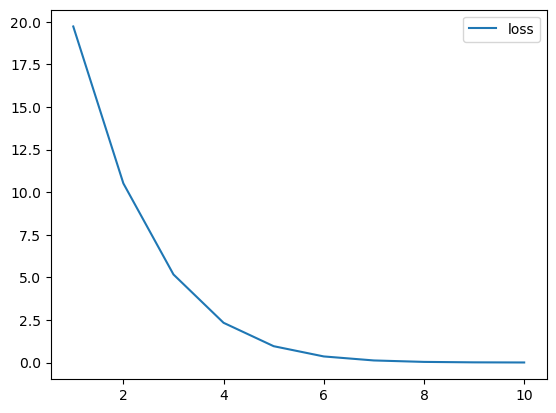

In [65]:
num_epochs = 10
l_test = [1,2,3,4,5,6,7,8,9,10]
epoch_list = np.asarray(l_test)
loss_list = np.ones([10])

for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y) # net(X)为预测值
        trainer.zero_grad()
        l.backward()
        trainer.step() # 进行模型更新
    l = loss(net(features), labels)
    loss_list[epoch] = l

    print(f'epoch {epoch + 1}, loss {l:f}')

print(epoch_list)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.legend()
plt.show

In [66]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([ 0.0025, -0.0100])
b的估计误差： tensor([0.0491])
